In [1]:
#Setup conections to repo
import geopandas as gpd
url = "https://github.com/meade68/DACSS_690D_Week13_HW3/raw/refs/heads/main/DATA/tl_2020_19_bg.zip"
IA_TRACTS = gpd.read_file(url)
url = "https://github.com/meade68/DACSS_690D_Week13_HW3/raw/refs/heads/main/DATA/DECENNIALDHC2020.H3_2025-12-10T220427/DECENNIALDHC2020.H3-Data.csv"
IA_DATA= gpd.read_file(url)


C:\Users\meade\anaconda3\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,19,147,960300,4,191479603004,Block Group 4,G5030,S,9863278,93562,+43.1115380,-094.6578724,"POLYGON ((-94.6789 43.1152, -94.67864 43.1154,..."
1,19,147,960400,2,191479604002,Block Group 2,G5030,S,358070485,9562564,+43.0896933,-094.8453779,"POLYGON ((-94.91391 42.91864, -94.9139 42.9195..."
2,19,129,040100,4,191290401004,Block Group 4,G5030,S,27394633,0,+41.0022706,-095.5983260,"POLYGON ((-95.63293 41.00893, -95.63164 41.008..."
3,19,163,010401,1,191630104011,Block Group 1,G5030,S,49459275,0,+41.5522588,-090.7504067,"POLYGON ((-90.78506 41.51265, -90.78505 41.512..."
4,19,163,010401,2,191630104012,Block Group 2,G5030,S,1226261,0,+41.5893680,-090.7792075,"POLYGON ((-90.78389 41.59052, -90.78388 41.590..."


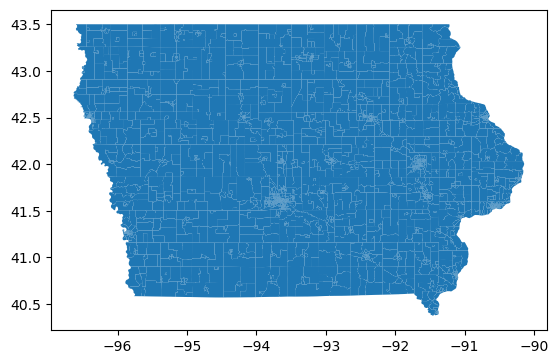

In [2]:
IA_TRACTS.plot()
IA_TRACTS.head()

In [3]:
IA_DATA.head()

,GEO_ID,NAME,H3_001N,H3_002N,H3_003N,field_6
0,Geography,Geographic Area Name,!!Total:,!!Total:!!Occupied,!!Total:!!Vacant,
1,1500000US190019601001,Block Group 1; Census Tract 9601; Adair County...,632,540,92,
2,1500000US190019601002,Block Group 2; Census Tract 9601; Adair County...,273,253,20,
3,1500000US190019601003,Block Group 3; Census Tract 9601; Adair County...,398,363,35,
4,1500000US190019602001,Block Group 1; Census Tract 9602; Adair County...,258,236,22,


In [4]:
#Drop original column  names. Rename the column names
IA_DATA = IA_DATA.iloc[1:].reset_index(drop=True)
IA_DATA = IA_DATA.iloc[:, :5]
IA_DATA.columns = ["Geography","Geographic Area Name",	"Total",	"Occupied",	"Vacant"]
IA_DATA.columns

Index(['Geography', 'Geographic Area Name', 'Total', 'Occupied', 'Vacant'], dtype='object')

In [5]:
#Trim/replace the first part of the string 
IA_DATA["Geography"] = IA_DATA["Geography"].str.replace("1500000US", "", regex=False)
IA_DATA.head()

,Geography,Geographic Area Name,Total,Occupied,Vacant
0,190019601001,Block Group 1; Census Tract 9601; Adair County...,632,540,92
1,190019601002,Block Group 2; Census Tract 9601; Adair County...,273,253,20
2,190019601003,Block Group 3; Census Tract 9601; Adair County...,398,363,35
3,190019602001,Block Group 1; Census Tract 9602; Adair County...,258,236,22
4,190019602002,Block Group 2; Census Tract 9602; Adair County...,543,468,75


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Geography,Geographic Area Name,Total,Occupied,Vacant
0,19,147,960300,4,191479603004,Block Group 4,G5030,S,9863278,93562,+43.1115380,-094.6578724,"POLYGON ((-94.6789 43.1152, -94.67864 43.1154,...",191479603004,Block Group 4; Census Tract 9603; Palo Alto Co...,624,526,98
1,19,147,960400,2,191479604002,Block Group 2,G5030,S,358070485,9562564,+43.0896933,-094.8453779,"POLYGON ((-94.91391 42.91864, -94.9139 42.9195...",191479604002,Block Group 2; Census Tract 9604; Palo Alto Co...,523,336,187
2,19,129,040100,4,191290401004,Block Group 4,G5030,S,27394633,0,+41.0022706,-095.5983260,"POLYGON ((-95.63293 41.00893, -95.63164 41.008...",191290401004,Block Group 4; Census Tract 401; Mills County;...,526,469,57
3,19,163,010401,1,191630104011,Block Group 1,G5030,S,49459275,0,+41.5522588,-090.7504067,"POLYGON ((-90.78506 41.51265, -90.78505 41.512...",191630104011,Block Group 1; Census Tract 104.01; Scott Coun...,428,405,23
4,19,163,010401,2,191630104012,Block Group 2,G5030,S,1226261,0,+41.5893680,-090.7792075,"POLYGON ((-90.78389 41.59052, -90.78388 41.590...",191630104012,Block Group 2; Census Tract 104.01; Scott Coun...,394,364,30


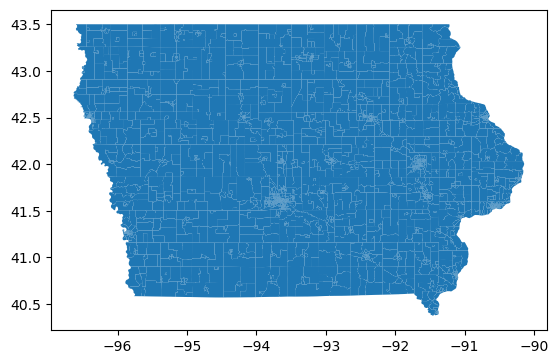

In [6]:
IA_MERGED = IA_TRACTS.merge(IA_DATA, left_on="GEOID", right_on="Geography", how="inner")
IA_MERGED.plot()
IA_MERGED.head()

In [7]:

#calculate percentage vacant
import numpy as np
import pandas as pd

IA_MERGED["Vacant"] = pd.to_numeric(IA_MERGED["Vacant"], errors="coerce")
IA_MERGED["Total"]  = pd.to_numeric(IA_MERGED["Total"], errors="coerce")

IA_MERGED["PCT_VACANT"] = IA_MERGED["Vacant"] / IA_MERGED["Total"] * 100

IA_MERGED["PCT_VACANT"] = IA_MERGED["PCT_VACANT"].fillna(0)

In [8]:
IA_MERGED.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Geography,Geographic Area Name,Total,Occupied,Vacant,PCT_VACANT
0,19,147,960300,4,191479603004,Block Group 4,G5030,S,9863278,93562,+43.1115380,-094.6578724,"POLYGON ((-94.6789 43.1152, -94.67864 43.1154,...",191479603004,Block Group 4; Census Tract 9603; Palo Alto Co...,624,526,98,15.705128
1,19,147,960400,2,191479604002,Block Group 2,G5030,S,358070485,9562564,+43.0896933,-094.8453779,"POLYGON ((-94.91391 42.91864, -94.9139 42.9195...",191479604002,Block Group 2; Census Tract 9604; Palo Alto Co...,523,336,187,35.755258
2,19,129,040100,4,191290401004,Block Group 4,G5030,S,27394633,0,+41.0022706,-095.5983260,"POLYGON ((-95.63293 41.00893, -95.63164 41.008...",191290401004,Block Group 4; Census Tract 401; Mills County;...,526,469,57,10.836502
3,19,163,010401,1,191630104011,Block Group 1,G5030,S,49459275,0,+41.5522588,-090.7504067,"POLYGON ((-90.78506 41.51265, -90.78505 41.512...",191630104011,Block Group 1; Census Tract 104.01; Scott Coun...,428,405,23,5.373832
4,19,163,010401,2,191630104012,Block Group 2,G5030,S,1226261,0,+41.5893680,-090.7792075,"POLYGON ((-90.78389 41.59052, -90.78388 41.590...",191630104012,Block Group 2; Census Tract 104.01; Scott Coun...,394,364,30,7.614213


In [9]:
#
DisMap=IA_MERGED.copy()

In [10]:
from libpysal.graph import Graph

DisMap_adjaceny=Graph.build_contiguity(DisMap)
DisMap_adjaceny.isolates

Index([], dtype='int64', name='focal')

In [11]:
DisMap.drop(index=DisMap_adjaceny.isolates,inplace=True)
DisMap.reset_index(drop=True,inplace=True)

In [13]:
#check CRS
DisMap.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [15]:
selected_variables = ['PCT_VACANT']
DisMap[selected_variables].describe()

,PCT_VACANT
count,2703.000000
mean,8.900042
std,6.476581
min,0.000000
25%,5.186253
50%,7.675195
75%,11.011236
max,74.932372


<Axes: >

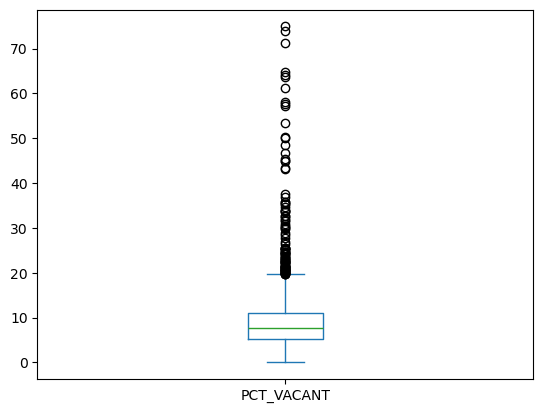

In [22]:
DisMap[selected_variables].plot(kind='box')

OOf.

In [19]:
import pandas as pd
import numpy as np
from scipy.stats import median_abs_deviation as mad

# --- Function to Perform Robust Standardization (Z-score via Median and MAD) ---
def robust_score(series):
    # 1. Calculate the Median
    median_val = series.median()
    # 2. Calculate the Median Absolute Deviation (MAD)
    mad_val = mad(series, scale='normal') #for comparability with Zs
    # 3. Apply the Robust Formula
    return (series - median_val) / mad_val

In [20]:
deficit_cols = ['PCT_VACANT']

clusterNames=['Vacant_Housing']
DisMap[clusterNames]=DisMap[deficit_cols].apply(robust_score)
DisMap[clusterNames]

,Vacant_Housing
0,1.932388
1,6.757415
2,0.760763
3,-0.553819
4,-0.014675
...,...
2698,-0.046552
2699,-0.582001
2700,-0.471889
2701,0.369897


In [25]:
import numpy
RANDOM_SEED = 12345
numpy.random.seed(RANDOM_SEED)

from sklearn.cluster import KMeans

K_target = 5

# as simple as:
DisMap['deficit_k5'] = KMeans(n_clusters=K_target,random_state=RANDOM_SEED).fit_predict(DisMap[clusterNames])

In [26]:
DisMap.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,INTPTLON,geometry,Geography,Geographic Area Name,Total,Occupied,Vacant,PCT_VACANT,Vacant_Housing,deficit_k5
0,19,147,960300,4,191479603004,Block Group 4,G5030,S,9863278,93562,...,-094.6578724,"POLYGON ((-94.6789 43.1152, -94.67864 43.1154,...",191479603004,Block Group 4; Census Tract 9603; Palo Alto Co...,624,526,98,15.705128,1.932388,4
1,19,147,960400,2,191479604002,Block Group 2,G5030,S,358070485,9562564,...,-094.8453779,"POLYGON ((-94.91391 42.91864, -94.9139 42.9195...",191479604002,Block Group 2; Census Tract 9604; Palo Alto Co...,523,336,187,35.755258,6.757415,3
2,19,129,040100,4,191290401004,Block Group 4,G5030,S,27394633,0,...,-095.5983260,"POLYGON ((-95.63293 41.00893, -95.63164 41.008...",191290401004,Block Group 4; Census Tract 401; Mills County;...,526,469,57,10.836502,0.760763,1
3,19,163,010401,1,191630104011,Block Group 1,G5030,S,49459275,0,...,-090.7504067,"POLYGON ((-90.78506 41.51265, -90.78505 41.512...",191630104011,Block Group 1; Census Tract 104.01; Scott Coun...,428,405,23,5.373832,-0.553819,0
4,19,163,010401,2,191630104012,Block Group 2,G5030,S,1226261,0,...,-090.7792075,"POLYGON ((-90.78389 41.59052, -90.78388 41.590...",191630104012,Block Group 2; Census Tract 104.01; Scott Coun...,394,364,30,7.614213,-0.014675,1


In [27]:
# see distribution of districts
DisMap["deficit_k5"].value_counts()

deficit_k5
1    1087
0    1041
4     487
3      68
2      20
Name: count, dtype: int64

In [29]:
# for most cases except spatial kmeans
IA_perim_graph = Graph.build_contiguity(DisMap, by_perimeter=True)
IA_perim_graph=IA_perim_graph.transform("r")

# for spatial kmeans
from libpysal.weights import W # Import W for the conversion
IA_perim = IA_perim_graph.to_W()
IA_perim.transform = "r"

In [31]:
type(IA_perim_graph),type(IA_perim)

(libpysal.graph.base.Graph, libpysal.weights.weights.W)

In [32]:
from spopt.region import RegionKMeansHeuristic as RKMeans

RKMeans_model = RKMeans(data=DisMap[clusterNames].values, 
                        n_clusters=K_target,
                        seed=RANDOM_SEED,
                        w=IA_perim,drop_islands=True)
# computing
RKMeans_model.solve()

In [33]:
#add the column
DisMap['deficit_k5R'] = RKMeans_model.labels_
DisMap["deficit_k5R"].value_counts()

deficit_k5R
2    737
1    677
3    562
4    404
0    323
Name: count, dtype: int64

In [ ]:
from spopt.region import AZP

azp_model = AZP(
    gdf=DisMap,
    w=IA_perim_graph,
    attrs_name=clusterNames,
    n_clusters=K_target,
    random_state=RANDOM_SEED)
# computing
azp_model.solve()

In [ ]:
#Add the columns
DisMap['deficit_azpR'] = azp_model.labels_
DisMap["deficit_azpR"].value_counts()